In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import DataLoader, Subset
import numpy as np

# Cấu hình thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transform áp dụng cho CIFAR-10
img2vec_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize ảnh cho phù hợp với ResNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Tải CIFAR-10 dataset
cifar10_train = datasets.CIFAR10(root='.', train=True, transform=img2vec_transforms, download=True)
cifar10_test = datasets.CIFAR10(root='.', train=False, transform=img2vec_transforms, download=True)

sample_size = 1000  # Số lượng mẫu để so sánh
subset_indices_test = list(range(min(sample_size, len(cifar10_test))))
subset_test = Subset(cifar10_test, subset_indices_test)
dataloader_test = DataLoader(subset_test, batch_size=128, shuffle=False)

subset_indices_train = list(range(min(sample_size, len(cifar10_train))))
subset_train = Subset(cifar10_train, subset_indices_train)
dataloader_train = DataLoader(subset_train, batch_size=128, shuffle=False)

# Mô hình ResNet-50 mặc định
resnet_default = resnet50(weights=ResNet50_Weights.DEFAULT).to(device)
resnet_default.fc = torch.nn.Identity()  # Loại bỏ lớp phân loại
resnet_default.eval()

# Hàm tính embedding
def get_embeddings(model, dataloader):
    embeddings = []
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            emb = model(images).cpu()
            embeddings.append(emb)
    return torch.cat(embeddings, dim=0)

# Lấy embedding từ cả hai mô hình trên tập test và train
embedding_default_test = get_embeddings(resnet_default, dataloader_test)
embedding_default_train = get_embeddings(resnet_default, dataloader_train)
print("Embedding test (default):", embedding_default_test.shape)
print("Embedding train (default):", embedding_default_train.shape)

Using device: cpu


100%|██████████| 170M/170M [00:15<00:00, 11.0MB/s] 


Extracting .\cifar-10-python.tar.gz to .
Files already downloaded and verified


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\21520/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 51.5MB/s]


Embedding test (default): torch.Size([1000, 2048])
Embedding train (default): torch.Size([1000, 2048])


In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import DataLoader, Subset
import numpy as np

In [22]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import DataLoader, Subset
import numpy as np

# Cấu hình thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transform áp dụng cho các bộ dữ liệu
img2vec_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize ảnh cho phù hợp với ResNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Chọn bộ dữ liệu (thay đổi tên dataset để sử dụng bộ khác)
dataset_name = "MNIST"  # Thay bằng "CIFAR10", "SVHN", "FashionMNIST", v.v.

if dataset_name == "CIFAR10":
    train_dataset = datasets.CIFAR10(root='.', train=True, transform=img2vec_transforms, download=True)
    test_dataset = datasets.CIFAR10(root='.', train=False, transform=img2vec_transforms, download=True)
elif dataset_name == "STL10":
    train_dataset = datasets.STL10(root='.', split='train', transform=img2vec_transforms, download=True)
    test_dataset = datasets.STL10(root='.', split='test', transform=img2vec_transforms, download=True)
elif dataset_name == "SVHN":
    train_dataset = datasets.SVHN(root='.', split='train', transform=img2vec_transforms, download=True)
    test_dataset = datasets.SVHN(root='.', split='test', transform=img2vec_transforms, download=True)
elif dataset_name == "FashionMNIST":
    grayscale_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),  # Chuyển ảnh xám thành 3 kênh
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    train_dataset = datasets.FashionMNIST(root='.', train=True, transform=grayscale_transform, download=True)
    test_dataset = datasets.FashionMNIST(root='.', train=False, transform=grayscale_transform, download=True)
elif dataset_name == "MNIST":
    grayscale_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),  # Chuyển ảnh xám thành 3 kênh
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    train_dataset = datasets.MNIST(root='.', train=True, transform=grayscale_transform, download=True)
    test_dataset = datasets.MNIST(root='.', train=False, transform=grayscale_transform, download=True)
else:
    raise ValueError(f"Dataset {dataset_name} không được hỗ trợ.")

# Subset để giảm kích thước tập dữ liệu
sample_size = 2000  # Số lượng mẫu để so sánh
subset_indices_test = list(range(min(sample_size, len(test_dataset))))
subset_test = Subset(test_dataset, subset_indices_test)
dataloader_test = DataLoader(subset_test, batch_size=128, shuffle=False)

subset_indices_train = list(range(min(sample_size, len(train_dataset))))
subset_train = Subset(train_dataset, subset_indices_train)
dataloader_train = DataLoader(subset_train, batch_size=128, shuffle=False)

# Mô hình ResNet-50 mặc định
resnet_default = resnet50(weights=ResNet50_Weights.DEFAULT).to(device)
resnet_default.fc = torch.nn.Identity()  # Loại bỏ lớp phân loại
resnet_default.eval()

# Hàm tính embedding
def get_embeddings(model, dataloader):
    embeddings = []
    with torch.no_grad():
        for images, _ in dataloader:
            images = images.to(device)
            emb = model(images).cpu()
            embeddings.append(emb)
    return torch.cat(embeddings, dim=0)

# Lấy embedding từ cả hai mô hình trên tập test và train
embedding_default_test = get_embeddings(resnet_default, dataloader_test)
embedding_default_train = get_embeddings(resnet_default, dataloader_train)
print(f"Embedding test ({dataset_name}):", embedding_default_test.shape)
print(f"Embedding train ({dataset_name}):", embedding_default_train.shape)

Using device: cpu
Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:07<00:00, 1.35MB/s]


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 109kB/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.05MB/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.59MB/s]


Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw

Embedding test (MNIST): torch.Size([2000, 2048])
Embedding train (MNIST): torch.Size([2000, 2048])


In [23]:
# resnet_default_test -> valid/ test
# resnet_default_train -> train
embedding_default_valid = embedding_default_test[1000:]
embedding_default_test = embedding_default_test[:1000]
embedding_default_train = embedding_default_train.numpy()
print(embedding_default_valid.shape)
print(embedding_default_test.shape)
print(embedding_default_train.shape)

torch.Size([1000, 2048])
torch.Size([1000, 2048])
(2000, 2048)


In [24]:
embedding_default_valid = embedding_default_valid.numpy()
embedding_default_test = embedding_default_test.numpy()

In [25]:
def get_labels(dataloader):
    labels = []
    with torch.no_grad():
        for _, label in dataloader:
            labels.append(label)
    return torch.cat(labels, dim=0)

In [26]:
finetuned_label_train = get_labels(dataloader_train)
finetuned_label_test = get_labels(dataloader_test)
print(finetuned_label_train.shape)
print(finetuned_label_test.shape)

torch.Size([2000])
torch.Size([2000])


In [27]:
finetuned_label_train = finetuned_label_train.numpy()
finetuned_label_valid = finetuned_label_test[1000:]
finetuned_label_test = finetuned_label_test[:1000]
finetuned_label_valid = finetuned_label_valid.numpy()
finetuned_label_test = finetuned_label_test.numpy()

In [28]:
# save
import pickle

with open('x_y_embedding_mnist.pkl', 'wb') as f:
    #pickle.dump((x_embeddings, y_labels, xt_embeddings, yt_labels), f)
    pickle.dump((embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test), f)

In [2]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_mnist.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)

Training embeddings shape: (2000, 2048)
Training labels shape: (2000,)
Validation embeddings shape: (1000, 2048)
Validation labels shape: (1000,)


In [ ]:
import torch
import numpy as np

# Chuyển dữ liệu sang torch.Tensor nếu cần
x_embeddings = torch.tensor(x_embeddings, dtype=torch.float32) if not isinstance(x_embeddings, torch.Tensor) else x_embeddings
xt_embeddings = torch.tensor(xt_embeddings, dtype=torch.float32) if not isinstance(xt_embeddings, torch.Tensor) else xt_embeddings

# Tính giá trị trung bình và độ lệch chuẩn từ X_train
mean = x_embeddings.mean(dim=0)  # Trung bình theo từng cột (feature)
std = x_embeddings.std(dim=0)    # Độ lệch chuẩn theo từng cột (feature)

# Đảm bảo std không có giá trị 0 để tránh chia cho 0
std[std == 0] = 1e-8

# Chuẩn hóa dữ liệu
X_train_normalized = (x_embeddings - mean) / std
X_valid_normalized = (xt_embeddings - mean) / std

# In kết quả
print("After normalization:")
print(X_train_normalized.shape, X_valid_normalized.shape)



In [ ]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = X_train_normalized.clone()
param = add_gauss_noise(X_copy, X_valid_normalized, noise_rate=0.2)
X_train_normalized_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_normalized_noisy.shape)
# train model logistic regression
input_dim = X_train_normalized_noisy.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(X_train_normalized_noisy, y_labels, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(X_valid_normalized)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

In [34]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = x_embeddings.copy()
param = add_gauss_noise(X_copy, x_embeddings, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(X_train_noisy, y_labels, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

Noisy training labels shape: (2000, 2048)
Epoch [10/1000], Loss: 1.6261
Epoch [20/1000], Loss: 1.5703
Epoch [30/1000], Loss: 1.5461
Epoch [40/1000], Loss: 1.5316
Epoch [50/1000], Loss: 1.5224
Epoch [60/1000], Loss: 1.5166
Epoch [70/1000], Loss: 1.5121
Epoch [80/1000], Loss: 1.5081
Epoch [90/1000], Loss: 1.5051
Epoch [100/1000], Loss: 1.5027
Epoch [110/1000], Loss: 1.4998
Epoch [120/1000], Loss: 1.4977
Epoch [130/1000], Loss: 1.4957
Epoch [140/1000], Loss: 1.4941
Epoch [150/1000], Loss: 1.4930
Epoch [160/1000], Loss: 1.4911
Epoch [170/1000], Loss: 1.4905
Epoch [180/1000], Loss: 1.4892
Epoch [190/1000], Loss: 1.4880
Epoch [200/1000], Loss: 1.4864
Epoch [210/1000], Loss: 1.4857
Epoch [220/1000], Loss: 1.4846
Epoch [230/1000], Loss: 1.4841
Epoch [240/1000], Loss: 1.4833
Epoch [250/1000], Loss: 1.4829
Epoch [260/1000], Loss: 1.4822
Epoch [270/1000], Loss: 1.4817
Epoch [280/1000], Loss: 1.4812
Epoch [290/1000], Loss: 1.4808
Epoch [300/1000], Loss: 1.4803
Epoch [310/1000], Loss: 1.4804
Epoch 

Running evaluator: KNNEvaluator


100%|██████████| 1999/1999 [00:00<00:00, 2072.82it/s]


KNNEvaluator completed in 1.96 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[  39.9156,   46.0528,   63.3782,  ...,   76.3651,   93.4377,
           52.7740],
        [4283.2061, 4281.8999, 4305.8550,  ..., 4270.2705, 4331.6187,
         4281.5376],
        [  32.3618,   45.7736,   52.8486,  ...,   74.7096,  105.6388,
           47.8265],
        ...,
        [  64.3362,   58.8090,   75.7416,  ...,   39.9467,   72.6452,
           62.6568],
        [  66.3153,   42.1158,   75.5267,  ...,   59.8938,   95.9965,
           37.4105],
        [4196.2637, 4203.9580, 4170.1758,  ..., 4153.4673, 4194.9570,
         4171.0508]])
C2 la: tensor([[0.1740, 0.1999, 0.1763,  ..., 0.1880, 0.1795, 0.1690],
        [0.1764, 0.2015, 0.1806,  ..., 0.0000, 0.1821, 0.1721],
        [0.1798, 0.2071, 0.1853,  ..., 0.1952, 0.1838, 0.1774],
        ...,
        [0.1740, 0.1999, 0.1763,  ..., 0.1880, 0.1795, 0.1690],
        [0.1894, 0.0000, 0.1906,  ..., 0.2015, 0.1953, 0.1837],
        [0.1764, 0.2015, 0.1806,  ..., 0.0000, 0.1821, 0.1721]])
C1 la: tensor([[0.0079, 0.00

d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


LavaEvaluator completed in 1.10 seconds.
KNNEvaluator: {'found_rates': [0.0, 0.0, 0.0825, 0.33, 0.5575, 0.785, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


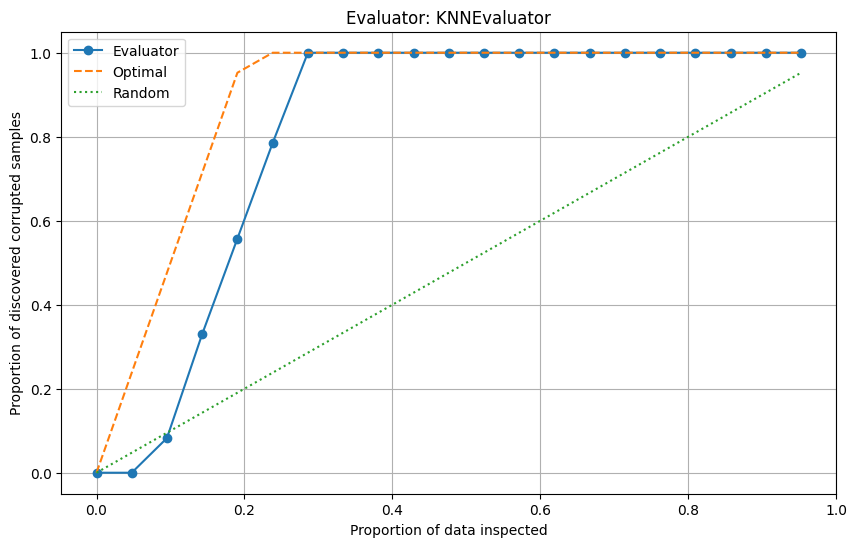

LavaEvaluator: {'found_rates': [0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


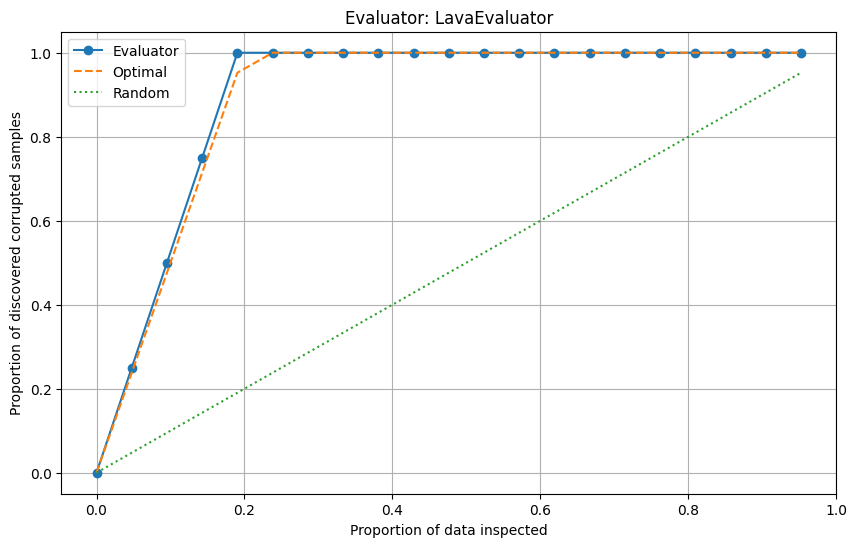

{'KNNEvaluator': {'found_rates': [0.0,
   0.0,
   0.0825,
   0.33,
   0.5575,
   0.785,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.25,
   0.5,
   0.75,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.1904761

In [35]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [13]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_labels.copy()
param = mix_label(y_copy, yt_labels, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

1000
Noisy training labels shape: (2000,)
Epoch [10/1000], Loss: 1.8532
Epoch [20/1000], Loss: 1.8013
Epoch [30/1000], Loss: 1.7822
Epoch [40/1000], Loss: 1.7380
Epoch [50/1000], Loss: 1.7212
Epoch [60/1000], Loss: 1.7121
Epoch [70/1000], Loss: 1.7060
Epoch [80/1000], Loss: 1.7001
Epoch [90/1000], Loss: 1.6969
Epoch [100/1000], Loss: 1.6939
Epoch [110/1000], Loss: 1.6893
Epoch [120/1000], Loss: 1.6891
Epoch [130/1000], Loss: 1.6850
Epoch [140/1000], Loss: 1.6837
Epoch [150/1000], Loss: 1.6833
Epoch [160/1000], Loss: 1.6811
Epoch [170/1000], Loss: 1.6785
Epoch [180/1000], Loss: 1.6797
Epoch [190/1000], Loss: 1.6765
Epoch [200/1000], Loss: 1.6759
Epoch [210/1000], Loss: 1.6753
Epoch [220/1000], Loss: 1.6733
Epoch [230/1000], Loss: 1.6726
Epoch [240/1000], Loss: 1.6719
Epoch [250/1000], Loss: 1.6700
Epoch [260/1000], Loss: 1.6695
Epoch [270/1000], Loss: 1.6681
Epoch [280/1000], Loss: 1.6684
Epoch [290/1000], Loss: 1.6671
Epoch [300/1000], Loss: 1.6663
Epoch [310/1000], Loss: 1.6647
Epoch 

Running evaluator: KNNEvaluator


100%|██████████| 1999/1999 [00:01<00:00, 1611.00it/s]


KNNEvaluator completed in 2.45 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[ 39.9156,  46.0528,  63.3782,  ...,  76.3651,  93.4377,  52.7740],
        [ 59.2133,  51.0661,  75.1126,  ...,  38.8479,  97.6818,  34.5315],
        [ 32.3618,  45.7736,  52.8486,  ...,  74.7096, 105.6388,  47.8265],
        ...,
        [ 64.3362,  58.8090,  75.7416,  ...,  39.9467,  72.6452,  62.6568],
        [ 66.3153,  42.1158,  75.5267,  ...,  59.8938,  95.9965,  37.4105],
        [104.9049, 102.3875, 106.3096,  ...,  60.0309,  83.1569,  87.5684]])
C2 la: tensor([[0.3188, 0.2723, 0.3830,  ..., 0.3017, 0.3284, 0.2797],
        [0.3188, 0.2723, 0.3830,  ..., 0.3017, 0.3284, 0.2797],
        [0.3067, 0.2811, 0.3446,  ..., 0.3789, 0.3547, 0.3113],
        ...,
        [0.3188, 0.2723, 0.3830,  ..., 0.3017, 0.3284, 0.2797],
        [0.2660, 0.0000, 0.3349,  ..., 0.2837, 0.2726, 0.2545],
        [0.2660, 0.0000, 0.3349,  ..., 0.2837, 0.2726, 0.2545]])
C1 la: tensor([[0.2222, 0.2605, 0.3686,  ..., 0.4496, 0.5562, 0.3024],
        [0.3426, 0.2917, 0.4418,  ..., 0.2155, 

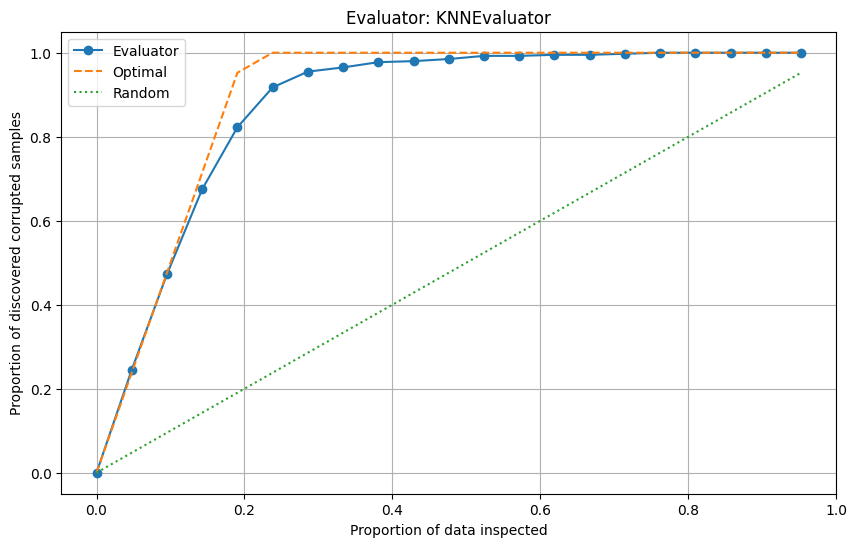

LavaEvaluator: {'found_rates': [0.0, 0.1, 0.2, 0.3075, 0.42, 0.495, 0.5825, 0.6375, 0.685, 0.73, 0.7675, 0.8075, 0.855, 0.89, 0.915, 0.935, 0.9475, 0.9625, 0.975, 0.9975, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


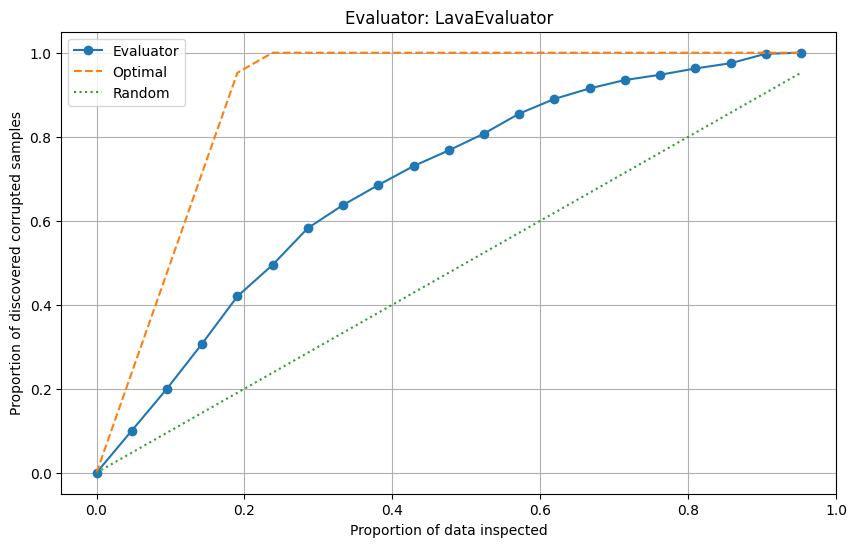

{'KNNEvaluator': {'found_rates': [0.0,
   0.245,
   0.4725,
   0.675,
   0.8225,
   0.9175,
   0.955,
   0.965,
   0.9775,
   0.98,
   0.985,
   0.9925,
   0.9925,
   0.995,
   0.995,
   0.9975,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.1,
   0.2,
   0.3075,
   0.42,
   0.495,
   0.5825,
   0.6375,
   0.685,
   0.73,
   0.7675,
   0.8075,
   0.855,
   0.89,
   0.915,
   0.935,
   0.9475,
   0.9625,
   0.975,
   0.9975,
   1.0],
  'axis': [0.0,
   0.0476190476190476

In [14]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(x_embeddings, y_labels_noisy, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [18]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_stl10.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)

Training embeddings shape: (1000, 2048)
Training labels shape: (1000,)
Validation embeddings shape: (500, 2048)
Validation labels shape: (500,)


In [19]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = x_embeddings.copy()
param = add_gauss_noise(X_copy, x_embeddings, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(X_train_noisy, y_labels, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

Noisy training labels shape: (1000, 2048)
Epoch [10/1000], Loss: 1.5123
Epoch [20/1000], Loss: 1.4869
Epoch [30/1000], Loss: 1.4793
Epoch [40/1000], Loss: 1.4756
Epoch [50/1000], Loss: 1.4732
Epoch [60/1000], Loss: 1.4717
Epoch [70/1000], Loss: 1.4707
Epoch [80/1000], Loss: 1.4698
Epoch [90/1000], Loss: 1.4688
Epoch [100/1000], Loss: 1.4682
Epoch [110/1000], Loss: 1.4677
Epoch [120/1000], Loss: 1.4674
Epoch [130/1000], Loss: 1.4671
Epoch [140/1000], Loss: 1.4697
Epoch [150/1000], Loss: 1.4666
Epoch [160/1000], Loss: 1.4664
Epoch [170/1000], Loss: 1.4663
Epoch [180/1000], Loss: 1.4662
Epoch [190/1000], Loss: 1.4661
Epoch [200/1000], Loss: 1.4660
Epoch [210/1000], Loss: 1.4659
Epoch [220/1000], Loss: 1.4658
Epoch [230/1000], Loss: 1.4657
Epoch [240/1000], Loss: 1.4657
Epoch [250/1000], Loss: 1.4656
Epoch [260/1000], Loss: 1.4655
Epoch [270/1000], Loss: 1.4654
Epoch [280/1000], Loss: 1.4654
Epoch [290/1000], Loss: 1.4654
Epoch [300/1000], Loss: 1.4653
Epoch [310/1000], Loss: 1.4653
Epoch 

Running evaluator: KNNEvaluator


100%|██████████| 999/999 [00:00<00:00, 3237.04it/s]


KNNEvaluator completed in 0.66 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[ 150.8591,   84.5476,  125.7259,  ...,  128.1398,   96.2250,
          112.2974],
        [4335.2871, 4288.9062, 4309.8530,  ..., 4313.6138, 4303.4004,
         4326.9800],
        [ 117.0582,   89.0728,  108.6973,  ...,  111.4780,   76.2621,
           85.9305],
        ...,
        [ 113.9003,   81.9752,  112.6453,  ...,   77.7437,   75.0934,
           87.9381],
        [ 115.5976,  100.2617,  124.5019,  ...,  112.6031,   85.2148,
          102.5515],
        [3930.6594, 3883.6580, 3904.4058,  ..., 3866.7188, 3868.8103,
         3848.2395]])
C2 la: tensor([[0.1802, 0.2093, 0.2331,  ..., 0.2216, 0.1802, 0.2331],
        [0.2188, 0.2406, 0.0000,  ..., 0.2584, 0.2188, 0.0000],
        [0.1802, 0.2093, 0.2331,  ..., 0.2216, 0.1802, 0.2331],
        ...,
        [0.1547, 0.1843, 0.2078,  ..., 0.1957, 0.1547, 0.2078],
        [0.1547, 0.1843, 0.2078,  ..., 0.1957, 0.1547, 0.2078],
        [0.1547, 0.1843, 0.2078,  ..., 0.1957, 0.1547, 0.2078]])
C1 la: tensor([[0.0310, 0.01

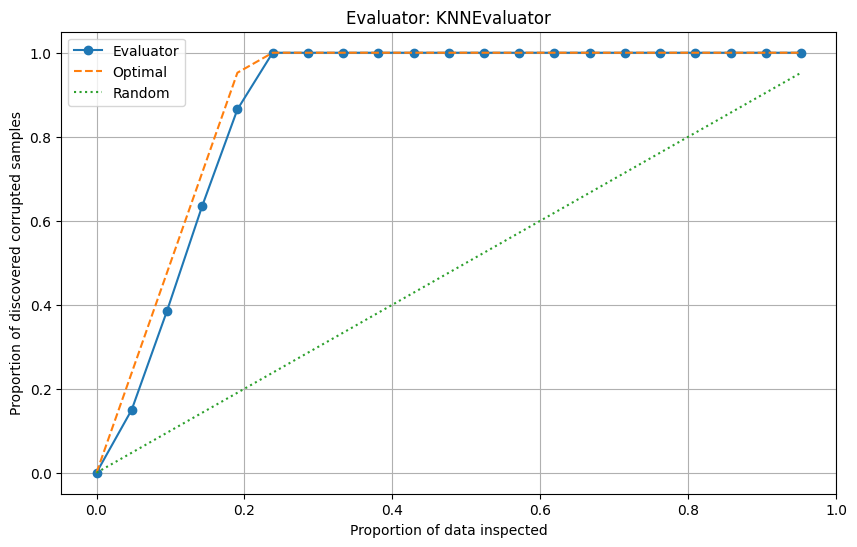

LavaEvaluator: {'found_rates': [0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


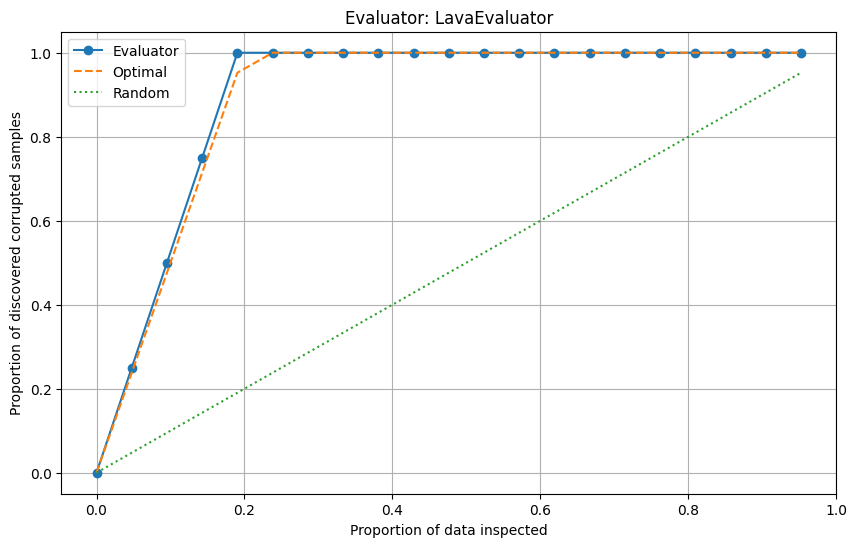

{'KNNEvaluator': {'found_rates': [0.0,
   0.15,
   0.385,
   0.635,
   0.865,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.25,
   0.5,
   0.75,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.190476190

In [20]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [10]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_labels.copy()
param = mix_label(y_copy, yt_labels, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

500
Noisy training labels shape: (1000,)
Epoch [10/1000], Loss: 1.7087
Epoch [20/1000], Loss: 1.6834
Epoch [30/1000], Loss: 1.6755
Epoch [40/1000], Loss: 1.6713
Epoch [50/1000], Loss: 1.6711
Epoch [60/1000], Loss: 1.6656
Epoch [70/1000], Loss: 1.6663
Epoch [80/1000], Loss: 1.6614
Epoch [90/1000], Loss: 1.6656
Epoch [100/1000], Loss: 1.6616
Epoch [110/1000], Loss: 1.6575
Epoch [120/1000], Loss: 1.6539
Epoch [130/1000], Loss: 1.6617
Epoch [140/1000], Loss: 1.6578
Epoch [150/1000], Loss: 1.6630
Epoch [160/1000], Loss: 1.6504
Epoch [170/1000], Loss: 1.6553
Epoch [180/1000], Loss: 1.6578
Epoch [190/1000], Loss: 1.6511
Epoch [200/1000], Loss: 1.6510
Epoch [210/1000], Loss: 1.6534
Epoch [220/1000], Loss: 1.6475
Epoch [230/1000], Loss: 1.6556
Epoch [240/1000], Loss: 1.6468
Epoch [250/1000], Loss: 1.6547
Epoch [260/1000], Loss: 1.6480
Epoch [270/1000], Loss: 1.6554
Epoch [280/1000], Loss: 1.6552
Epoch [290/1000], Loss: 1.6457
Epoch [300/1000], Loss: 1.6418
Epoch [310/1000], Loss: 1.6437
Epoch [

Running evaluator: KNNEvaluator


100%|██████████| 999/999 [00:00<00:00, 2348.29it/s]


KNNEvaluator completed in 0.81 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[150.8591,  84.5476, 125.7259,  ..., 128.1398,  96.2250, 112.2974],
        [100.3953, 101.2167,  91.0863,  ..., 116.4529,  77.1558,  82.5928],
        [117.0582,  89.0728, 108.6973,  ..., 111.4780,  76.2621,  85.9305],
        ...,
        [113.9003,  81.9752, 112.6453,  ...,  77.7437,  75.0934,  87.9381],
        [115.5976, 100.2617, 124.5019,  ..., 112.6031,  85.2148, 102.5515],
        [107.5361,  88.6603, 111.2877,  ...,  70.4887,  66.9263,  83.0382]])
C2 la: tensor([[0.4010, 0.3826, 0.4005,  ..., 0.4079, 0.4010, 0.4005],
        [0.0000, 0.4220, 0.4119,  ..., 0.4624, 0.0000, 0.4119],
        [0.4010, 0.3826, 0.4005,  ..., 0.4079, 0.4010, 0.4005],
        ...,
        [0.3476, 0.3178, 0.3915,  ..., 0.3527, 0.3476, 0.3915],
        [0.3476, 0.3178, 0.3915,  ..., 0.3527, 0.3476, 0.3915],
        [0.4311, 0.4195, 0.3881,  ..., 0.4276, 0.4311, 0.3881]])
C1 la: tensor([[0.5925, 0.3247, 0.4910,  ..., 0.5008, 0.3719, 0.4368],
        [0.3887, 0.3920, 0.3511,  ..., 0.4536, 

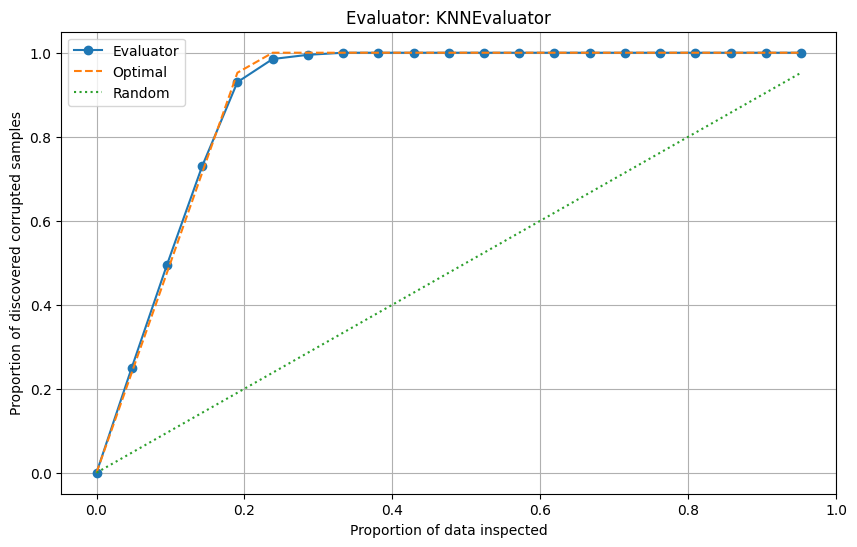

LavaEvaluator: {'found_rates': [0.0, 0.085, 0.2, 0.305, 0.425, 0.52, 0.595, 0.65, 0.705, 0.77, 0.835, 0.87, 0.875, 0.915, 0.945, 0.95, 0.97, 0.975, 0.98, 0.985, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


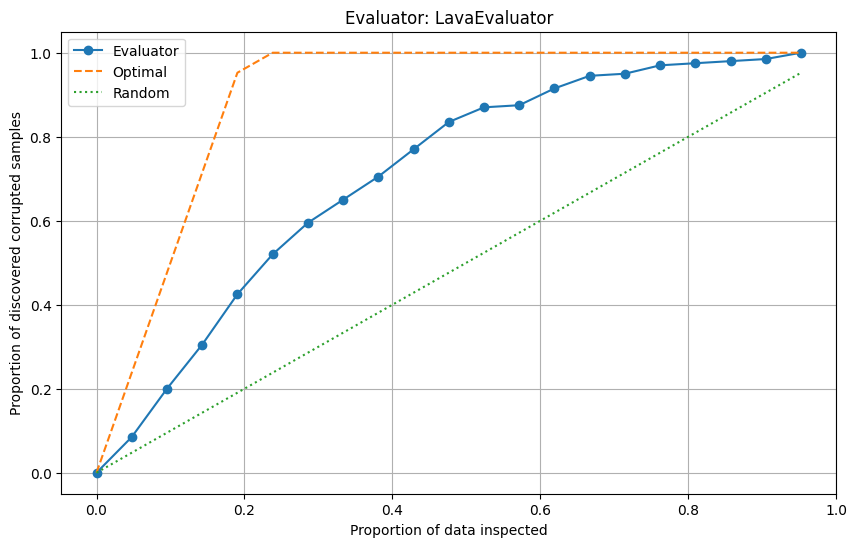

{'KNNEvaluator': {'found_rates': [0.0,
   0.25,
   0.495,
   0.73,
   0.93,
   0.985,
   0.995,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.085,
   0.2,
   0.305,
   0.425,
   0.52,
   0.595,
   0.65,
   0.705,
   0.77,
   0.835,
   0.87,
   0.875,
   0.915,
   0.945,
   0.95,
   0.97,
   0.975,
   0.98,
   0.985,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.1428

In [11]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(x_embeddings, y_labels_noisy, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [30]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_fashion.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)

Training embeddings shape: (2000, 2048)
Training labels shape: (2000,)
Validation embeddings shape: (1000, 2048)
Validation labels shape: (1000,)


In [31]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = x_embeddings.copy()
param = add_gauss_noise(X_copy, x_embeddings, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(X_train_noisy, y_labels, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

Noisy training labels shape: (2000, 2048)
Epoch [10/1000], Loss: 1.6262
Epoch [20/1000], Loss: 1.5870
Epoch [30/1000], Loss: 1.5687
Epoch [40/1000], Loss: 1.5579
Epoch [50/1000], Loss: 1.5506
Epoch [60/1000], Loss: 1.5434
Epoch [70/1000], Loss: 1.5383
Epoch [80/1000], Loss: 1.5335
Epoch [90/1000], Loss: 1.5297
Epoch [100/1000], Loss: 1.5262
Epoch [110/1000], Loss: 1.5234
Epoch [120/1000], Loss: 1.5206
Epoch [130/1000], Loss: 1.5192
Epoch [140/1000], Loss: 1.5167
Epoch [150/1000], Loss: 1.5153
Epoch [160/1000], Loss: 1.5138
Epoch [170/1000], Loss: 1.5131
Epoch [180/1000], Loss: 1.5117
Epoch [190/1000], Loss: 1.5104
Epoch [200/1000], Loss: 1.5098
Epoch [210/1000], Loss: 1.5090
Epoch [220/1000], Loss: 1.5084
Epoch [230/1000], Loss: 1.5070
Epoch [240/1000], Loss: 1.5064
Epoch [250/1000], Loss: 1.5062
Epoch [260/1000], Loss: 1.5053
Epoch [270/1000], Loss: 1.5046
Epoch [280/1000], Loss: 1.5039
Epoch [290/1000], Loss: 1.5034
Epoch [300/1000], Loss: 1.5027
Epoch [310/1000], Loss: 1.5022
Epoch 

Running evaluator: KNNEvaluator


100%|██████████| 1999/1999 [00:00<00:00, 2126.47it/s]


KNNEvaluator completed in 2.11 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[  54.8312,   93.2283,   97.1927,  ...,   83.0623,   95.2208,
           75.1309],
        [4342.3696, 4368.4312, 4339.7866,  ..., 4333.7729, 4327.0205,
         4372.7065],
        [  89.5640,   68.8354,   46.8374,  ...,   73.4082,  100.4244,
          103.5837],
        ...,
        [  77.6753,   96.9612,   72.8408,  ...,   89.4864,  108.4295,
          100.5110],
        [  88.1987,   84.5702,   82.2129,  ...,  117.6313,   37.5620,
           67.3403],
        [4139.7495, 4165.7974, 4173.9067,  ..., 4176.0557, 4163.6509,
         4158.9116]])
C2 la: tensor([[0.0000, 0.2060, 0.1590,  ..., 0.1652, 0.1801, 0.1801],
        [0.1639, 0.1932, 0.1487,  ..., 0.1576, 0.1656, 0.1656],
        [0.1639, 0.1932, 0.1487,  ..., 0.1576, 0.1656, 0.1656],
        ...,
        [0.1726, 0.1951, 0.1540,  ..., 0.1615, 0.1737, 0.1737],
        [0.2084, 0.2336, 0.1888,  ..., 0.1932, 0.2109, 0.2109],
        [0.2045, 0.2276, 0.1875,  ..., 0.1952, 0.2044, 0.2044]])
C1 la: tensor([[0.0107, 0.01

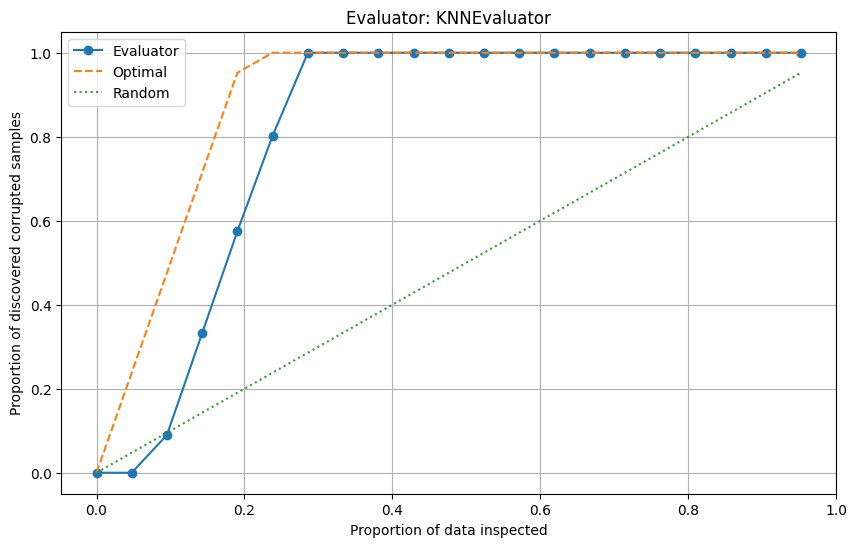

LavaEvaluator: {'found_rates': [0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


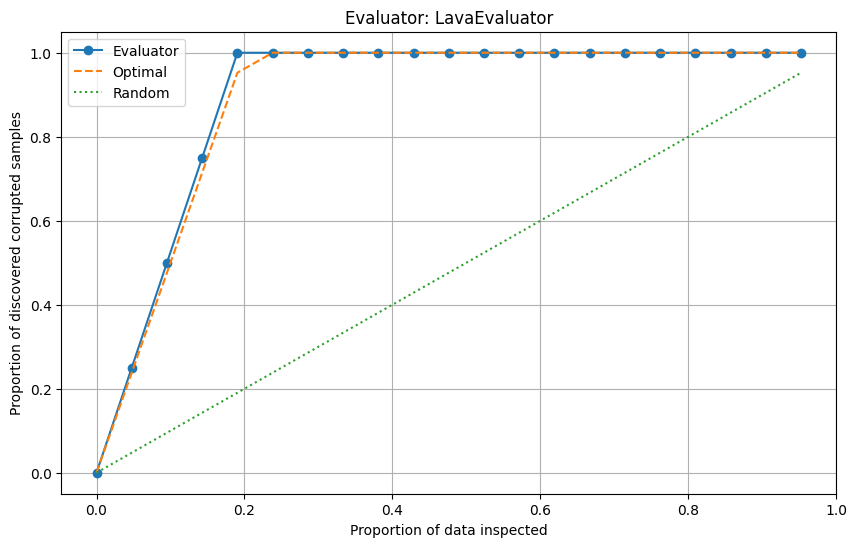

{'KNNEvaluator': {'found_rates': [0.0,
   0.0,
   0.09,
   0.3325,
   0.575,
   0.8025,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.25,
   0.5,
   0.75,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.1904761

In [32]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [7]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_labels.copy()
param = mix_label(y_copy, yt_labels, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

1000
Noisy training labels shape: (2000,)
Epoch [10/1000], Loss: 1.8311
Epoch [20/1000], Loss: 1.8016
Epoch [30/1000], Loss: 1.7695
Epoch [40/1000], Loss: 1.7553
Epoch [50/1000], Loss: 1.7443
Epoch [60/1000], Loss: 1.7365
Epoch [70/1000], Loss: 1.7309
Epoch [80/1000], Loss: 1.7257
Epoch [90/1000], Loss: 1.7211
Epoch [100/1000], Loss: 1.7170
Epoch [110/1000], Loss: 1.7149
Epoch [120/1000], Loss: 1.7116
Epoch [130/1000], Loss: 1.7084
Epoch [140/1000], Loss: 1.7064
Epoch [150/1000], Loss: 1.7042
Epoch [160/1000], Loss: 1.7018
Epoch [170/1000], Loss: 1.7004
Epoch [180/1000], Loss: 1.6997
Epoch [190/1000], Loss: 1.6993
Epoch [200/1000], Loss: 1.6973
Epoch [210/1000], Loss: 1.6956
Epoch [220/1000], Loss: 1.6962
Epoch [230/1000], Loss: 1.6943
Epoch [240/1000], Loss: 1.6933
Epoch [250/1000], Loss: 1.6929
Epoch [260/1000], Loss: 1.6911
Epoch [270/1000], Loss: 1.6891
Epoch [280/1000], Loss: 1.6895
Epoch [290/1000], Loss: 1.6873
Epoch [300/1000], Loss: 1.6875
Epoch [310/1000], Loss: 1.6872
Epoch 

Running evaluator: KNNEvaluator


100%|██████████| 1999/1999 [00:00<00:00, 2275.09it/s]


KNNEvaluator completed in 1.89 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[ 54.8312,  93.2283,  97.1927,  ...,  83.0623,  95.2208,  75.1309],
        [ 87.0881,  68.6039,  70.0559,  ...,  64.4980, 103.5537, 101.4826],
        [ 89.5640,  68.8354,  46.8374,  ...,  73.4082, 100.4244, 103.5837],
        ...,
        [ 77.6753,  96.9612,  72.8408,  ...,  89.4864, 108.4295, 100.5110],
        [ 88.1987,  84.5702,  82.2129,  ..., 117.6313,  37.5620,  67.3403],
        [101.8270,  87.6495,  91.4218,  ...,  92.4103,  98.4113, 101.5891]])
C2 la: tensor([[0.0000, 0.4383, 0.4379,  ..., 0.4111, 0.3454, 0.3454],
        [0.4208, 0.5182, 0.5196,  ..., 0.5100, 0.3285, 0.3285],
        [0.4606, 0.3641, 0.4577,  ..., 0.3691, 0.5110, 0.5110],
        ...,
        [0.4008, 0.3458, 0.3661,  ..., 0.3118, 0.4412, 0.4412],
        [0.4208, 0.5182, 0.5196,  ..., 0.5100, 0.3285, 0.3285],
        [0.4606, 0.3641, 0.4577,  ..., 0.3691, 0.5110, 0.5110]])
C1 la: tensor([[0.2362, 0.4209, 0.4399,  ..., 0.3720, 0.4305, 0.3339],
        [0.3914, 0.3025, 0.3095,  ..., 0.2827, 

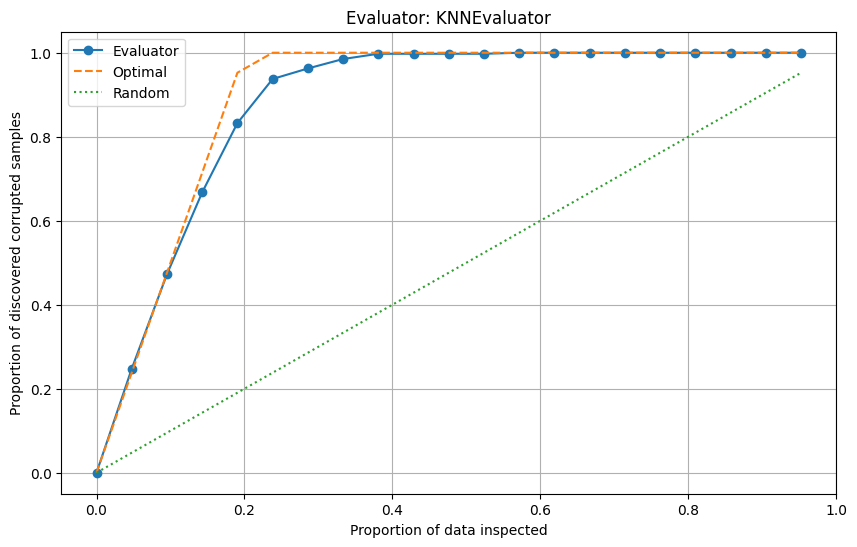

LavaEvaluator: {'found_rates': [0.0, 0.16, 0.3025, 0.4, 0.4775, 0.5425, 0.6, 0.6425, 0.6725, 0.725, 0.7775, 0.82, 0.86, 0.9, 0.935, 0.955, 0.97, 0.9775, 0.9825, 0.995, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


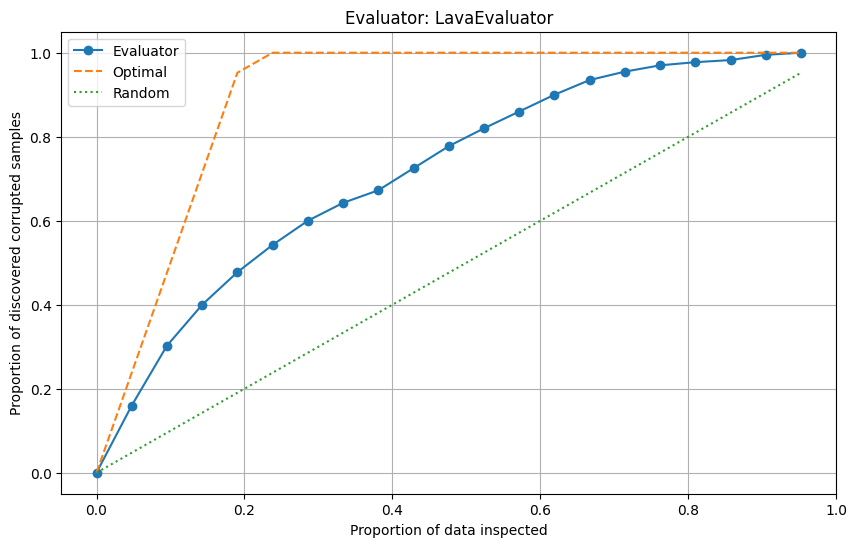

{'KNNEvaluator': {'found_rates': [0.0,
   0.2475,
   0.4725,
   0.6675,
   0.8325,
   0.9375,
   0.9625,
   0.985,
   0.9975,
   0.9975,
   0.9975,
   0.9975,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.16,
   0.3025,
   0.4,
   0.4775,
   0.5425,
   0.6,
   0.6425,
   0.6725,
   0.725,
   0.7775,
   0.82,
   0.86,
   0.9,
   0.935,
   0.955,
   0.97,
   0.9775,
   0.9825,
   0.995,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   

In [8]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(x_embeddings, y_labels_noisy, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [24]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_svhn.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)

Training embeddings shape: (2000, 2048)
Training labels shape: (2000,)
Validation embeddings shape: (1000, 2048)
Validation labels shape: (1000,)


In [25]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = x_embeddings.copy()
param = add_gauss_noise(X_copy, x_embeddings, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(X_train_noisy, y_labels, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

Noisy training labels shape: (2000, 2048)
Epoch [10/1000], Loss: 2.0010
Epoch [20/1000], Loss: 1.9437
Epoch [30/1000], Loss: 1.9015
Epoch [40/1000], Loss: 1.8730
Epoch [50/1000], Loss: 1.8508
Epoch [60/1000], Loss: 1.8350
Epoch [70/1000], Loss: 1.8196
Epoch [80/1000], Loss: 1.8077
Epoch [90/1000], Loss: 1.7982
Epoch [100/1000], Loss: 1.7905
Epoch [110/1000], Loss: 1.7809
Epoch [120/1000], Loss: 1.7750
Epoch [130/1000], Loss: 1.7710
Epoch [140/1000], Loss: 1.7661
Epoch [150/1000], Loss: 1.7606
Epoch [160/1000], Loss: 1.7554
Epoch [170/1000], Loss: 1.7523
Epoch [180/1000], Loss: 1.7474
Epoch [190/1000], Loss: 1.7424
Epoch [200/1000], Loss: 1.7416
Epoch [210/1000], Loss: 1.7374
Epoch [220/1000], Loss: 1.7355
Epoch [230/1000], Loss: 1.7323
Epoch [240/1000], Loss: 1.7303
Epoch [250/1000], Loss: 1.7277
Epoch [260/1000], Loss: 1.7271
Epoch [270/1000], Loss: 1.7228
Epoch [280/1000], Loss: 1.7216
Epoch [290/1000], Loss: 1.7215
Epoch [300/1000], Loss: 1.7191
Epoch [310/1000], Loss: 1.7154
Epoch 

Running evaluator: KNNEvaluator


100%|██████████| 1999/1999 [00:00<00:00, 2219.67it/s]


KNNEvaluator completed in 1.85 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[ 124.1725,  131.9061,  147.8742,  ...,  150.0780,   82.0987,
           85.9277],
        [4363.6162, 4416.6938, 4437.5312,  ..., 4393.4800, 4323.6665,
         4325.5112],
        [  95.1643,   81.3969,  100.8806,  ...,  106.5282,  126.2330,
          131.4699],
        ...,
        [  80.7946,   73.1638,  103.0954,  ...,   70.5713,  121.0808,
          143.9572],
        [  86.5403,   75.9729,   85.9258,  ...,   46.6137,  136.8762,
          152.3698],
        [4183.5264, 4139.3262, 4196.1123,  ..., 4197.2437, 4234.9634,
         4284.9502]])
C2 la: tensor([[0.1936, 0.1828, 0.0000,  ..., 0.1936, 0.0000, 0.1936],
        [0.1792, 0.1710, 0.1771,  ..., 0.1792, 0.1771, 0.1792],
        [0.1819, 0.0000, 0.1828,  ..., 0.1819, 0.1828, 0.1819],
        ...,
        [0.1936, 0.1828, 0.0000,  ..., 0.1936, 0.0000, 0.1936],
        [0.2021, 0.1869, 0.1979,  ..., 0.2021, 0.1979, 0.2021],
        [0.2021, 0.1869, 0.1979,  ..., 0.2021, 0.1979, 0.2021]])
C1 la: tensor([[0.0246, 0.02

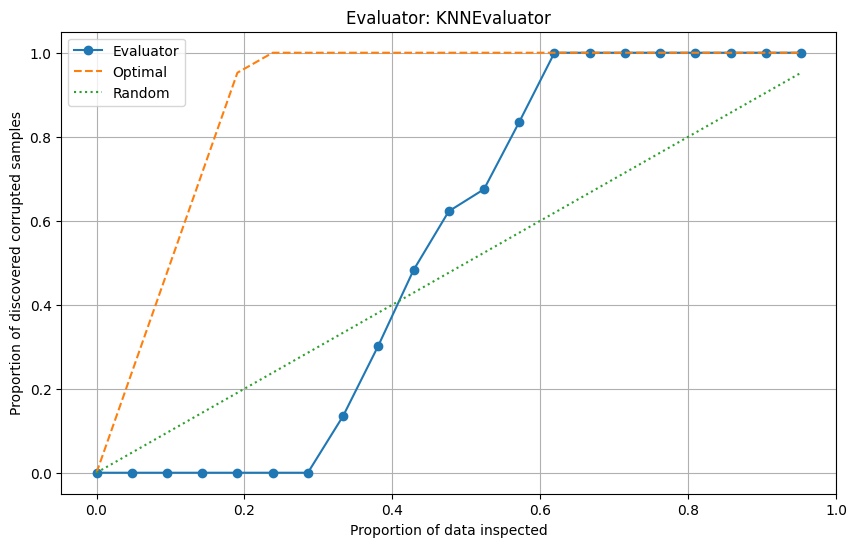

LavaEvaluator: {'found_rates': [0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


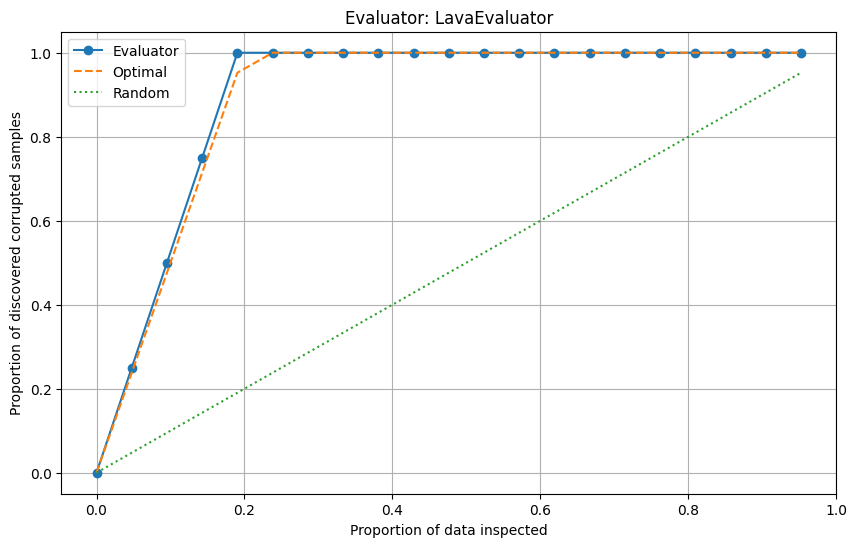

{'KNNEvaluator': {'found_rates': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.135,
   0.3025,
   0.4825,
   0.6225,
   0.675,
   0.835,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.25,
   0.5,
   0.75,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.1

In [26]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [4]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
y_copy = y_labels.copy()
param = mix_label(y_copy, yt_labels, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

1000
Noisy training labels shape: (2000,)
Epoch [10/1000], Loss: 2.1610
Epoch [20/1000], Loss: 2.1047
Epoch [30/1000], Loss: 2.0721
Epoch [40/1000], Loss: 2.0506
Epoch [50/1000], Loss: 2.0364
Epoch [60/1000], Loss: 2.0222
Epoch [70/1000], Loss: 2.0136
Epoch [80/1000], Loss: 2.0033
Epoch [90/1000], Loss: 1.9947
Epoch [100/1000], Loss: 1.9875
Epoch [110/1000], Loss: 1.9821
Epoch [120/1000], Loss: 1.9772
Epoch [130/1000], Loss: 1.9711
Epoch [140/1000], Loss: 1.9659
Epoch [150/1000], Loss: 1.9636
Epoch [160/1000], Loss: 1.9588
Epoch [170/1000], Loss: 1.9545
Epoch [180/1000], Loss: 1.9515
Epoch [190/1000], Loss: 1.9474
Epoch [200/1000], Loss: 1.9431
Epoch [210/1000], Loss: 1.9398
Epoch [220/1000], Loss: 1.9393
Epoch [230/1000], Loss: 1.9361
Epoch [240/1000], Loss: 1.9337
Epoch [250/1000], Loss: 1.9298
Epoch [260/1000], Loss: 1.9264
Epoch [270/1000], Loss: 1.9259
Epoch [280/1000], Loss: 1.9233
Epoch [290/1000], Loss: 1.9225
Epoch [300/1000], Loss: 1.9201
Epoch [310/1000], Loss: 1.9178
Epoch 

Running evaluator: KNNEvaluator


100%|██████████| 1999/1999 [00:00<00:00, 2226.83it/s]


KNNEvaluator completed in 1.92 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[124.1725, 131.9061, 147.8742,  ..., 150.0780,  82.0987,  85.9277],
        [141.3551, 143.7202, 162.5403,  ..., 163.2011, 102.6516, 107.4566],
        [ 95.1643,  81.3969, 100.8806,  ..., 106.5282, 126.2330, 131.4699],
        ...,
        [ 80.7946,  73.1638, 103.0954,  ...,  70.5713, 121.0808, 143.9572],
        [ 86.5403,  75.9729,  85.9258,  ...,  46.6137, 136.8762, 152.3698],
        [ 72.6856,  63.6140,  94.3149,  ..., 100.1436, 115.2072, 140.7551]])
C2 la: tensor([[0.3137, 0.2911, 0.0000,  ..., 0.3137, 0.0000, 0.3137],
        [0.2920, 0.3009, 0.2847,  ..., 0.2920, 0.2847, 0.2920],
        [0.3004, 0.0000, 0.2911,  ..., 0.3004, 0.2911, 0.3004],
        ...,
        [0.3137, 0.2911, 0.0000,  ..., 0.3137, 0.0000, 0.3137],
        [0.2636, 0.2755, 0.3221,  ..., 0.2636, 0.3221, 0.2636],
        [0.0000, 0.3004, 0.3137,  ..., 0.0000, 0.3137, 0.0000]])
C1 la: tensor([[0.4826, 0.5156, 0.5838,  ..., 0.5932, 0.3028, 0.3192],
        [0.5560, 0.5661, 0.6465,  ..., 0.6493, 

d:\data_values\.venv\Lib\site-packages\ot\bregman\_sinkhorn.py:667: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn(


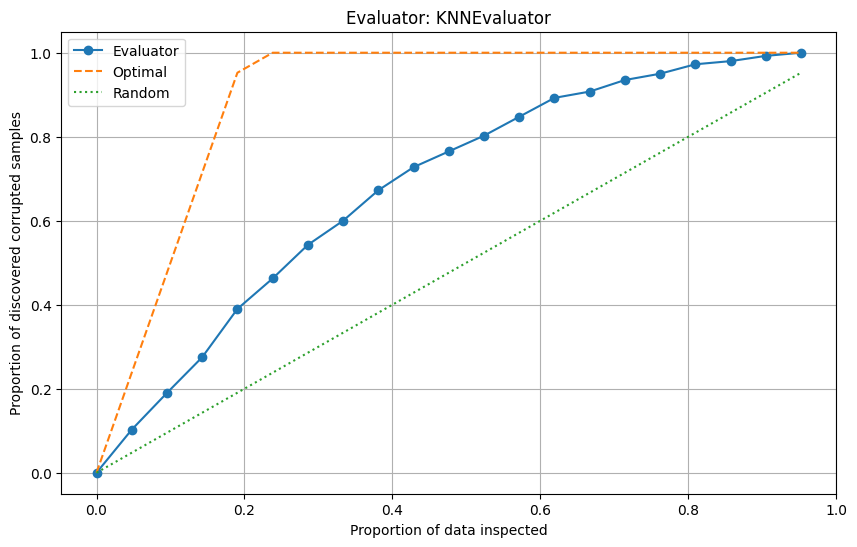

LavaEvaluator: {'found_rates': [0.0, 0.0775, 0.145, 0.2, 0.275, 0.345, 0.4025, 0.445, 0.515, 0.58, 0.63, 0.6775, 0.7175, 0.7625, 0.8075, 0.845, 0.8825, 0.915, 0.9475, 0.9825, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


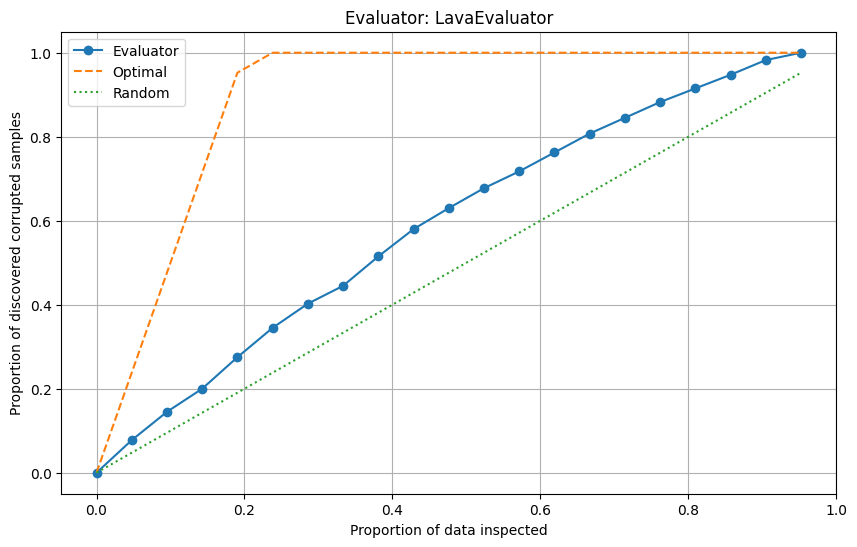

{'KNNEvaluator': {'found_rates': [0.0,
   0.1025,
   0.19,
   0.275,
   0.39,
   0.4625,
   0.5425,
   0.6,
   0.6725,
   0.7275,
   0.765,
   0.8025,
   0.8475,
   0.8925,
   0.9075,
   0.935,
   0.95,
   0.9725,
   0.98,
   0.9925,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.0775,
   0.145,
   0.2,
   0.275,
   0.345,
   0.4025,
   0.445,
   0.515,
   0.58,
   0.63,
   0.6775,
   0.7175,
   0.7625,
   0.8075,
   0.845,
   0.8825,
   0.915,
   0.9475,
   0.9825,
   1.0],
  'axis': [0.0,
   0.04761

In [5]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(x_embeddings, y_labels_noisy, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [ ]:
finetuned_label_train = finetuned_label_train.numpy()
finetuned_label_valid = finetuned_label_test[500:]
finetuned_label_test = finetuned_label_test[:500]
finetuned_label_valid = finetuned_label_valid.numpy()
finetuned_label_test = finetuned_label_test.numpy()

In [2]:

# resnet_default_test -> valid/ test
# resnet_default_train -> train
embedding_default_valid = embedding_default_test[500:]
embedding_default_test = embedding_default_test[:500]
embedding_default_train = embedding_default_train.numpy()

In [3]:
print(embedding_default_valid.shape)
print(embedding_default_test.shape)
print(embedding_default_train.shape)

torch.Size([500, 2048])
torch.Size([500, 2048])
(1000, 2048)


In [4]:
embedding_default_valid = embedding_default_valid.numpy()
embedding_default_test = embedding_default_test.numpy()

In [5]:
def get_labels(dataloader):
    labels = []
    with torch.no_grad():
        for _, label in dataloader:
            labels.append(label)
    return torch.cat(labels, dim=0)

In [6]:
finetuned_label_train = get_labels(dataloader_train)
finetuned_label_test = get_labels(dataloader_test)

In [9]:
print(finetuned_label_train.shape)
print(finetuned_label_test.shape)


(1000,)
(500,)


In [8]:
finetuned_label_train = finetuned_label_train.numpy()
finetuned_label_valid = finetuned_label_test[500:]
finetuned_label_test = finetuned_label_test[:500]
finetuned_label_valid = finetuned_label_valid.numpy()
finetuned_label_test = finetuned_label_test.numpy()


In [10]:
# save
import pickle

with open('x_y_embedding_cifar.pkl', 'wb') as f:
    #pickle.dump((x_embeddings, y_labels, xt_embeddings, yt_labels), f)
    pickle.dump((embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test), f)

In [27]:
### Load x_y_embedding_data
import pickle
with open('x_y_embedding_cifar.pkl', 'rb') as f:
    #x_embeddings, y_labels, xt_embeddings, yt_labels = pickle.load(f)
    embedding_default_train, finetuned_label_train, embedding_default_valid, finetuned_label_valid, embedding_default_test, finetuned_label_test = pickle.load(f)
x_embeddings = embedding_default_train
y_labels = finetuned_label_train
xt_embeddings = embedding_default_test
yt_labels = finetuned_label_test
print("Training embeddings shape:", x_embeddings.shape)
print("Training labels shape:", y_labels.shape)
print("Validation embeddings shape:", xt_embeddings.shape)
print("Validation labels shape:", yt_labels.shape)


Training embeddings shape: (1000, 2048)
Training labels shape: (1000,)
Validation embeddings shape: (500, 2048)
Validation labels shape: (500,)


In [28]:
from machine_learning_model import LogisticRegression
from nosify import mix_label, add_gauss_noise
X_copy = x_embeddings.copy()
param = add_gauss_noise(X_copy, x_embeddings, noise_rate=0.2)
X_train_noisy = param['x_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", X_train_noisy.shape)
# train model logistic regression
input_dim = X_train_noisy.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(X_train_noisy, y_labels, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

Noisy training labels shape: (1000, 2048)
Epoch [10/1000], Loss: 1.6142
Epoch [20/1000], Loss: 1.5576
Epoch [30/1000], Loss: 1.5364
Epoch [40/1000], Loss: 1.5193
Epoch [50/1000], Loss: 1.5087
Epoch [60/1000], Loss: 1.5014
Epoch [70/1000], Loss: 1.4964
Epoch [80/1000], Loss: 1.4939
Epoch [90/1000], Loss: 1.4886
Epoch [100/1000], Loss: 1.4859
Epoch [110/1000], Loss: 1.4837
Epoch [120/1000], Loss: 1.4821
Epoch [130/1000], Loss: 1.4801
Epoch [140/1000], Loss: 1.4788
Epoch [150/1000], Loss: 1.4776
Epoch [160/1000], Loss: 1.4771
Epoch [170/1000], Loss: 1.4758
Epoch [180/1000], Loss: 1.4752
Epoch [190/1000], Loss: 1.4746
Epoch [200/1000], Loss: 1.4741
Epoch [210/1000], Loss: 1.4738
Epoch [220/1000], Loss: 1.4736
Epoch [230/1000], Loss: 1.4732
Epoch [240/1000], Loss: 1.4729
Epoch [250/1000], Loss: 1.4727
Epoch [260/1000], Loss: 1.4726
Epoch [270/1000], Loss: 1.4723
Epoch [280/1000], Loss: 1.4721
Epoch [290/1000], Loss: 1.4720
Epoch [300/1000], Loss: 1.4718
Epoch [310/1000], Loss: 1.4717
Epoch 

Running evaluator: KNNEvaluator


100%|██████████| 999/999 [00:00<00:00, 3170.50it/s]


KNNEvaluator completed in 0.69 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[  97.0654,  140.8609,  148.0934,  ...,  138.1219,  106.0864,
          113.7622],
        [4291.9175, 4292.6118, 4293.3843,  ..., 4369.9331, 4337.9937,
         4275.7485],
        [ 133.7660,  109.9918,  113.6658,  ...,  186.2824,  123.1246,
          120.1510],
        ...,
        [ 117.7697,  116.7054,  109.9188,  ...,  190.1292,  120.7441,
          136.7580],
        [ 104.4853,  153.7678,  154.4441,  ...,  158.2452,  125.5026,
          117.2549],
        [3946.6338, 3928.7002, 3972.2053,  ..., 3970.5144, 3884.3845,
         3893.6797]])
C2 la: tensor([[0.1586, 0.1652, 0.1652,  ..., 0.1629, 0.1629, 0.1523],
        [0.2096, 0.2161, 0.2161,  ..., 0.2157, 0.2157, 0.2086],
        [0.2096, 0.2161, 0.2161,  ..., 0.2157, 0.2157, 0.2086],
        ...,
        [0.1916, 0.2015, 0.2015,  ..., 0.1985, 0.1985, 0.1888],
        [0.0000, 0.1909, 0.1909,  ..., 0.1919, 0.1919, 0.1783],
        [0.1712, 0.1804, 0.1804,  ..., 0.1768, 0.1768, 0.1688]])
C1 la: tensor([[0.0183, 0.02

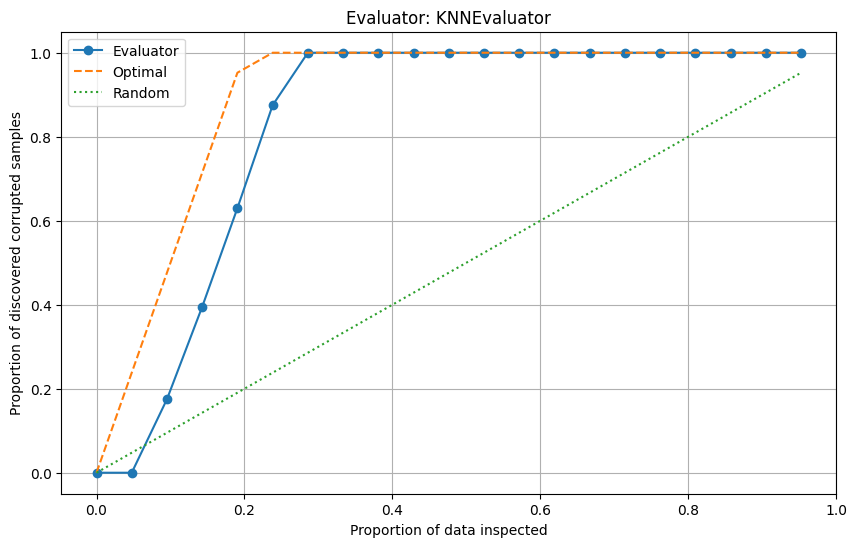

LavaEvaluator: {'found_rates': [0.0, 0.25, 0.5, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


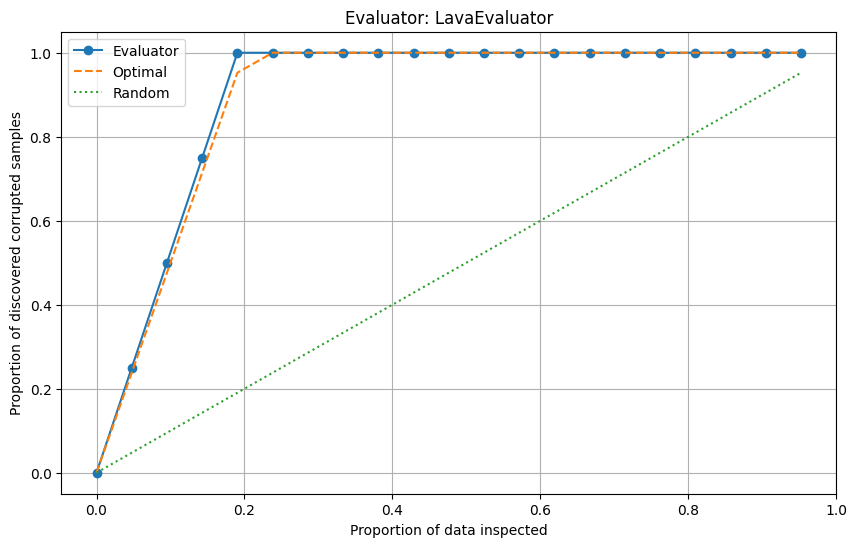

{'KNNEvaluator': {'found_rates': [0.0,
   0.0,
   0.175,
   0.395,
   0.63,
   0.875,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.25,
   0.5,
   0.75,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.190476190

In [29]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(X_train_noisy, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)

In [12]:
from machine_learning_model import LogisticRegression
from nosify import mix_label
param = mix_label(y_labels, yt_labels, noise_rate=0.2)
y_labels_noisy = param['y_train']
noisy_train_indices = param['noisy_train_indices']
print("Noisy training labels shape:", y_labels_noisy.shape)
# train model logistic regression
input_dim = x_embeddings.shape[1]
num_classes = len(np.unique(y_labels))
model = LogisticRegression(input_dim, num_classes)
model.fit(x_embeddings, y_labels_noisy, epochs= 1000, lr = 0.1)
# predict
y_pred = model.predict(xt_embeddings)
# evaluate
from sklearn.metrics import f1_score, accuracy_score
accuracy = f1_score(yt_labels, y_pred, average='weighted')
print("Accuracy:", accuracy)

500
Noisy training labels shape: (1000,)
Epoch [10/1000], Loss: 1.8079
Epoch [20/1000], Loss: 1.7511
Epoch [30/1000], Loss: 1.7243
Epoch [40/1000], Loss: 1.7060
Epoch [50/1000], Loss: 1.6904
Epoch [60/1000], Loss: 1.6811
Epoch [70/1000], Loss: 1.6748
Epoch [80/1000], Loss: 1.6693
Epoch [90/1000], Loss: 1.6665
Epoch [100/1000], Loss: 1.6605
Epoch [110/1000], Loss: 1.6573
Epoch [120/1000], Loss: 1.6599
Epoch [130/1000], Loss: 1.6550
Epoch [140/1000], Loss: 1.6529
Epoch [150/1000], Loss: 1.6479
Epoch [160/1000], Loss: 1.6431
Epoch [170/1000], Loss: 1.6418
Epoch [180/1000], Loss: 1.6465
Epoch [190/1000], Loss: 1.6444
Epoch [200/1000], Loss: 1.6380
Epoch [210/1000], Loss: 1.6402
Epoch [220/1000], Loss: 1.6394
Epoch [230/1000], Loss: 1.6444
Epoch [240/1000], Loss: 1.6402
Epoch [250/1000], Loss: 1.6360
Epoch [260/1000], Loss: 1.6349
Epoch [270/1000], Loss: 1.6344
Epoch [280/1000], Loss: 1.6309
Epoch [290/1000], Loss: 1.6332
Epoch [300/1000], Loss: 1.6301
Epoch [310/1000], Loss: 1.6325
Epoch [

Running evaluator: KNNEvaluator


100%|██████████| 999/999 [00:00<00:00, 2730.91it/s]


KNNEvaluator completed in 0.85 seconds.
Running evaluator: LavaEvaluator


C1 la: tensor([[ 97.0654, 140.8609, 148.0934,  ..., 138.1219, 106.0864, 113.7622],
        [119.2439,  81.5426,  73.9523,  ..., 175.9927, 101.4004,  95.4312],
        [133.7660, 109.9918, 113.6658,  ..., 186.2824, 123.1246, 120.1510],
        ...,
        [117.7697, 116.7054, 109.9188,  ..., 190.1292, 120.7441, 136.7580],
        [104.4853, 153.7678, 154.4441,  ..., 158.2452, 125.5026, 117.2549],
        [153.4403, 144.3592, 149.7472,  ..., 169.0080, 112.0029, 114.3165]])
C2 la: tensor([[0.4226, 0.4728, 0.4728,  ..., 0.4283, 0.4283, 0.4949],
        [0.4654, 0.4216, 0.4216,  ..., 0.4708, 0.4708, 0.0000],
        [0.4369, 0.3929, 0.3929,  ..., 0.4765, 0.4765, 0.3946],
        ...,
        [0.4906, 0.3937, 0.3937,  ..., 0.5144, 0.5144, 0.4454],
        [0.0000, 0.4696, 0.4696,  ..., 0.4869, 0.4869, 0.4654],
        [0.4696, 0.0000, 0.0000,  ..., 0.4613, 0.4613, 0.4216]])
C1 la: tensor([[0.3819, 0.5751, 0.6070,  ..., 0.5630, 0.4217, 0.4556],
        [0.4798, 0.3135, 0.2800,  ..., 0.7301, 

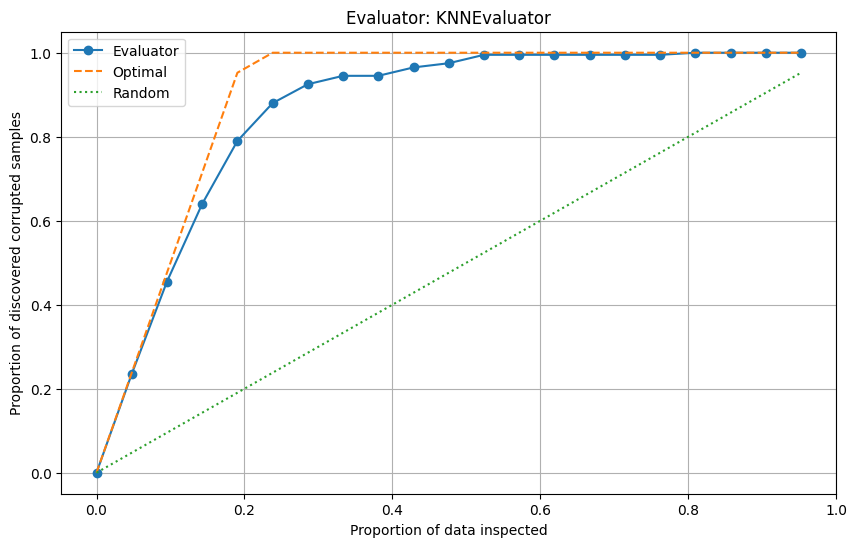

LavaEvaluator: {'found_rates': [0.0, 0.13, 0.225, 0.29, 0.385, 0.47, 0.535, 0.6, 0.64, 0.7, 0.74, 0.785, 0.81, 0.845, 0.875, 0.895, 0.945, 0.97, 0.985, 0.995, 1.0], 'axis': [0.0, 0.047619047619047616, 0.09523809523809523, 0.14285714285714285, 0.19047619047619047, 0.23809523809523808, 0.2857142857142857, 0.3333333333333333, 0.38095238095238093, 0.42857142857142855, 0.47619047619047616, 0.5238095238095238, 0.5714285714285714, 0.6190476190476191, 0.6666666666666666, 0.7142857142857143, 0.7619047619047619, 0.8095238095238095, 0.8571428571428571, 0.9047619047619048, 0.9523809523809523]}


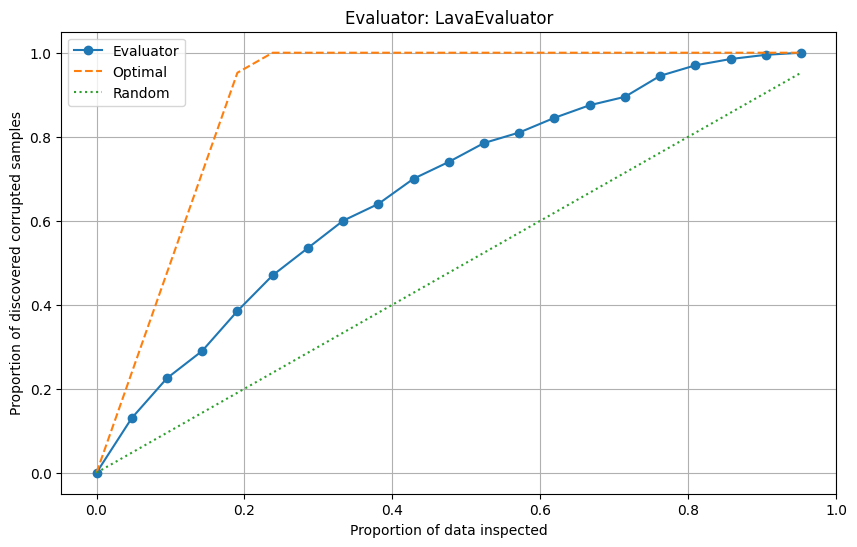

{'KNNEvaluator': {'found_rates': [0.0,
   0.235,
   0.455,
   0.64,
   0.79,
   0.88,
   0.925,
   0.945,
   0.945,
   0.965,
   0.975,
   0.995,
   0.995,
   0.995,
   0.995,
   0.995,
   0.995,
   1.0,
   1.0,
   1.0,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.09523809523809523,
   0.14285714285714285,
   0.19047619047619047,
   0.23809523809523808,
   0.2857142857142857,
   0.3333333333333333,
   0.38095238095238093,
   0.42857142857142855,
   0.47619047619047616,
   0.5238095238095238,
   0.5714285714285714,
   0.6190476190476191,
   0.6666666666666666,
   0.7142857142857143,
   0.7619047619047619,
   0.8095238095238095,
   0.8571428571428571,
   0.9047619047619048,
   0.9523809523809523]},
 'LavaEvaluator': {'found_rates': [0.0,
   0.13,
   0.225,
   0.29,
   0.385,
   0.47,
   0.535,
   0.6,
   0.64,
   0.7,
   0.74,
   0.785,
   0.81,
   0.845,
   0.875,
   0.895,
   0.945,
   0.97,
   0.985,
   0.995,
   1.0],
  'axis': [0.0,
   0.047619047619047616,
   0.0952380952

In [13]:
from base_evaluator import BaseEvaluator, KNNEvaluator, LavaEvaluator, ExperimentRunner

knn_evaluator = KNNEvaluator()
lava_evaluator = LavaEvaluator()
experiment = ExperimentRunner(evaluators=[knn_evaluator, lava_evaluator])
experiment.run(x_embeddings, y_labels, xt_embeddings, yt_labels)
experiment.evaluate(noisy_train_indices)